# Nelson-Siegel Model

For given maturity, a yield can be calculated as follows

$$ R(m) = \beta_0 + (\beta_1 + \beta_2)[1-exp(-\frac{m}{\tau})]\frac{\tau}{m}-\beta_2exp(-\frac{m}{\tau}) $$

In [59]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from matplotlib import pyplot as plt

def Nelson_Siegel(tau, beta0, beta1,beta2,m):
    
    rate = beta0 + (beta1 + beta2) * (1 - np.exp(-m / tau)) * tau / m - beta2 * np.exp(-m / tau)
    
    return rate
    

In [60]:
def objective_function(params, mkt_data):
    
    tau, beta0, beta1, beta2 = params
    residual = 0
    
    for mtk_yield, mkt_maturities in mkt_data:
        model_yield = Nelson_Siegel(tau, beta0, beta1, beta2, mkt_maturities)
        residual += (mtk_yield - model_yield)**2
    return residual
        
    
    

In [85]:
initial_params = [1,0.01,0.01,0.01]

#Yield Curve as of 1/3/2020
mkt_data = [(0.0159, 0.5),(0.0158,1),(0.0157,2),(0.0161,3),(0.0169,5),(0.0182, 7),(0.0192, 10),(0.0239,30)]
 

result = minimize(objective_function, initial_params,args=(mkt_data,))
optimal_params = result.x

print("Optimal Nelson-Siegel Parameters:", optimal_params)


Optimal Nelson-Siegel Parameters: [ 3.53434952  0.02679069 -0.01075746 -0.01401249]


In [86]:
Nelson_Siegel(optimal_params[0],optimal_params[1],optimal_params[1],optimal_params[3],10)

0.03186770495129249

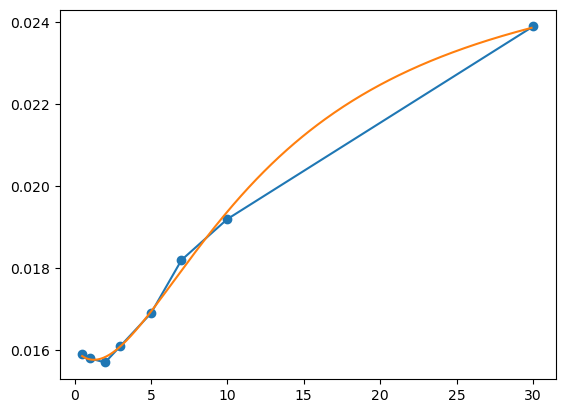

In [87]:
NS=[]
mat = np.arange(0.5,30,0.1)
for i in mat:
    NS.append(Nelson_Siegel(optimal_params[0],optimal_params[1],optimal_params[2],optimal_params[3],i))
    

mkt_yield, mkt_maturities = zip(*mkt_data)
plt.plot(mkt_maturities, mkt_yield,marker='o')
plt.plot(mat,NS)